# 2a. Dimensionality Reduction via Principal Component Analysis

After scaling the data and imputing data for missing values, we are ready to conduct dimensionality reduction. I have created two separate files for this step, differing on which algorithm they use (PCA vs. UMAP). These are designed to work completely separate from one another, and only running one of the two is necessary to move on to the supervised learning analyses.

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
pd.options.display.max_rows=10
pd.options.display.max_columns=6

In [51]:
class PCA_class:

    '''    
        INIT FUNCTION: 
        
        --Input csv file with raw data. Specify "IDs" -- any columns not to be scaled.
        
        --In the sample data, for example, the "IDs" are the ID column and the outcome variable column.
        
        --Output from this function includes a dataframe of only specified IDs and a dataframe of all other columns.
    '''
    
    def __init__(self, datafile, IDs = []):
        self.data = pd.read_csv(datafile)
        self.IDs = IDs
        self.IDdf = self.data.filter(IDs)
        self.nonIDdf = pd.DataFrame(self.data.drop(self.IDs, axis=1))
        
    '''
        ANALYSIS METHOD:
        
        --Runs PCA using a customizable number of principal components (PCs).
        
        --The n_components input can be an integer in order to specify an exact number of PCs...
        
        --...OR it can be a value from 0 to 1 (e.g., .85) to specify % of variance of the original data explained in the PCA data.
        
        --This method allows viewing of the explained variance ratio via ".evr".
        
        --This method also allows viewing of the importance of each feature for each PC via ".components_".
    '''
    
    def analysis(self, n_components = []):
        self.pca = PCA(n_components)
        self.pComps = self.pca.fit_transform(self.nonIDdf)
        self.evr = self.pca.explained_variance_ratio_
        self.cumevr = np.cumsum(self.evr)
        self.components_ = pd.DataFrame(self.pca.components_, columns = self.nonIDdf.columns)
        
    '''
        SCREE METHOD:
        
        --Prints a scree plot showing cumulative explained variance with each successive PC.
    '''
    
    def scree(self):
        plt.plot(np.cumsum(self.evr))
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
        plt.show()
        
    '''
        DF_CREATE METHOD:
        
        --Specify the number of PCs present in your analysis (must be an integer).
        
        --This method creates a dataframe from the PCA output (covariance matrix) for use in analysis.
    '''

    def df_create(self, num_pcs = []):
        
        def prepend(list, str): 
            str += '{0}'
            list = [str.format(i) for i in list] 
            return(list) 
        
        self.rangemax = num_pcs+1
        self.pclist = list(range(1,self.rangemax))
        self.pcstr = "PC"
        self.pccols = prepend(self.pclist, self.pcstr)
        self.pCompsdf = pd.DataFrame(data = self.pComps, columns = self.pccols)
        self.concatlist = [self.IDdf, self.pCompsdf]
        self.pcadf = pd.concat(self.concatlist, axis=1)
        
    '''
        SCALE METHOD:
        
        --Specify which scaler to use.
        
        --This method scales the covariance matrix of the PCA for use in analysis.
    '''
        
    def scale(self, scaler):
        self.scaler = scaler
        self.scaled_pCompsdf = pd.DataFrame(self.scaler.fit_transform(self.pCompsdf))
        self.scaled_concatlist = [self.IDdf, self.scaled_pCompsdf]
        self.scaled_pcadf = pd.concat(self.scaled_concatlist, axis=1)
        self.scaled_pcadf.columns = self.pcadf.columns
        
    '''
        CSV METHOD:
        
        --Specify a filename for the final, scaled output data of the PCA.
    '''
        
    def csv(self, csvname):
        self.scaled_pcadf.to_csv(csvname, index=False)

In [55]:
#I have read in the csv data file that we output at the end of Step 1 (KNN Imputation).
#I have specified the ID column and the presence outcome column not to be reduced by PCA.
pca = PCA_class("SCALED_NONAN_DATA.csv", IDs = ['labvisitid', 'presence'])

#I have chosen to use 20 components, since a good benchmark for not overfitting is to have 10x as many observations as features.
pca.analysis(n_components=20)

In [57]:
#This attribute outputs a graph of cumulative explained variance, with the total explained variance at bottom right.
#This PCA only explains 63% of variance in the data, which is not ideal (85% is a good benchmark).
pca.cumevr

array([0.07949152, 0.15563823, 0.21989264, 0.27205913, 0.31505039,
       0.35201314, 0.38586285, 0.41682739, 0.44254296, 0.46760648,
       0.49086518, 0.51337031, 0.53263674, 0.55105902, 0.56885747,
       0.584497  , 0.59916278, 0.613551  , 0.62674991, 0.63938398])

In [58]:
#This method will not run if the num_pcs value does not match the number of columns in the PCA covariance matrix.
#If n_components is specified as a decimal for explained variance in the analysis method above,...
#..it is important to find out how many components this results in before running the df_create method.
pca.df_create(num_pcs=20)

pca.scale(MinMaxScaler())

#I have output the csv file with this name to use in the supervised learning analyses.
pca.csv("SCALED_PCA_DATA.csv")

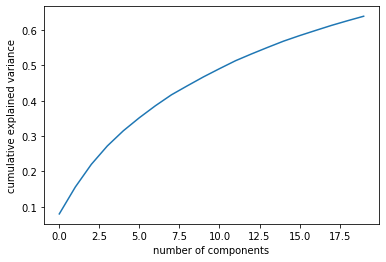

In [62]:
#The scree plot for the PCA shows that by 20 PCs, ~64% of the original variance is explained.
pca.scree()

In [61]:
#This table shows how much each of the 3457 features in the scaled, imputed, non-reduced data impacted each principal component.
pca.components_

,yaw_0.5,yaw_1,yaw_1.5,...,z_287.5,z_288,z_288.5
0,0.005566,0.006250,0.007720,...,-0.003097,-0.002172,0.003955
1,-0.008868,-0.009032,-0.008837,...,0.014981,0.006379,-0.001640
2,0.000741,0.000730,0.001272,...,-0.009246,-0.009147,-0.009621
3,-0.007055,-0.006888,-0.008011,...,0.001624,0.000344,0.002024
4,-0.000024,-0.000783,-0.000100,...,-0.025212,-0.018005,-0.024297
...,...,...,...,...,...,...,...
15,-0.006516,-0.007917,-0.006009,...,0.016723,0.014761,0.023394
16,-0.016488,-0.016960,-0.020050,...,-0.006149,-0.007898,0.002663
17,0.015677,0.020651,0.024556,...,0.007424,0.006882,0.017821
18,-0.003477,-0.003522,-0.004808,...,0.003261,0.006006,0.002947
